#StockX sneaker data analysis

##Initial imports and preprocessing


In [87]:
import numpy as np
import pandas as pd
from statistics import *
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch

In [88]:
# import kagglehub
# path = kagglehub.dataset_download("hudsonstuck/stockx-data-contest")
# print("Path to dataset files:", path)

In [89]:
# df = pd.read_csv("/root/.cache/kagglehub/datasets/hudsonstuck/stockx-data-contest/versions/1/StockX-Data-Contest-2019-3.csv")

In [ ]:
df= pd.read_csv("StockX_initial.csv")

In [91]:
df.head()

,order_date,order_month,order_year,release_date,brand,sneaker_name,shoe_size,sale_price,retail_price,profit,buyer_region,date_diff,price_ratio
0,2017-09-01,September,2017,2016-09-24,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,11.0,1097.0,220.0,877.0,California,342.0,4.986364
1,2017-09-01,September,2017,2017-02-25,Yeezy,Adidas Yeezy Boost 350 V2 Zebra,9.5,586.0,220.0,366.0,Oregon,188.0,2.663636
2,2017-09-01,September,2017,2017-02-25,Yeezy,Adidas Yeezy Boost 350 V2 Zebra,9.0,546.0,220.0,326.0,Florida,188.0,2.481818
3,2017-09-01,September,2017,2017-02-25,Yeezy,Adidas Yeezy Boost 350 V2 Zebra,5.5,850.0,220.0,630.0,Michigan,188.0,3.863636
4,2017-09-01,September,2017,2017-02-25,Yeezy,Adidas Yeezy Boost 350 V2 Zebra,9.0,589.0,220.0,369.0,New York,188.0,2.677273


In [92]:
df.columns

Index(['order_date', 'order_month', 'order_year', 'release_date', 'brand',
       'sneaker_name', 'shoe_size', 'sale_price', 'retail_price', 'profit',
       'buyer_region', 'date_diff', 'price_ratio'],
      dtype='object')

In [93]:
df.rename(index=str, columns={'Order Date': 'order_date',
                              'Brand' : 'brand',
                              'Sneaker Name' : 'sneaker_name',
                              'Sale Price' : 'sale_price',
                              'Retail Price' : 'retail_price',
                              'Release Date' : 'release_date',
                              'Shoe Size' : 'shoe_size',
                              'Buyer Region' : 'buyer_region'}, inplace=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99956 entries, 0 to 99955
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    99956 non-null  object 
 1   order_month   99956 non-null  object 
 2   order_year    99956 non-null  int64  
 3   release_date  99956 non-null  object 
 4   brand         99956 non-null  object 
 5   sneaker_name  99956 non-null  object 
 6   shoe_size     99956 non-null  float64
 7   sale_price    99956 non-null  float64
 8   retail_price  99956 non-null  float64
 9   profit        99956 non-null  float64
 10  buyer_region  99956 non-null  object 
 11  date_diff     99956 non-null  float64
 12  price_ratio   99956 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 10.7+ MB


In [95]:
df.isnull().sum()

,0
order_date,0
order_month,0
order_year,0
release_date,0
brand,0
sneaker_name,0
shoe_size,0
sale_price,0
retail_price,0
profit,0


In [96]:
df.describe()

,order_year,shoe_size,sale_price,retail_price,profit,date_diff,price_ratio
count,99956.000000,99956.000000,99956.000000,99956.00000,99956.000000,99956.000000,99956.000000
mean,2018.029013,9.344181,446.634719,208.61359,238.021129,183.708722,2.248245
std,0.542357,2.329588,255.982969,25.20001,266.133179,232.354142,1.508563
min,2017.000000,3.500000,186.000000,130.00000,-34.000000,-69.000000,0.845455
25%,2018.000000,8.000000,275.000000,220.00000,58.000000,10.000000,1.263636
50%,2018.000000,9.500000,370.000000,220.00000,154.000000,56.000000,1.704545
75%,2018.000000,11.000000,540.000000,220.00000,342.000000,345.000000,2.613636
max,2019.000000,17.000000,4050.000000,250.00000,3860.000000,1321.000000,21.315789


**Metadata**:
99,956 rows and 8 columns


*No missing values*

**Variables**-
**Order Date**: datetime, Date the transaction occurred

**Brand**: string, Brand of the sneaker

**Sneaker Name**: string, Name of the sneaker

**Sale Price**: numpy float, Price paid for sneaker in transaction (resale price)

**Retail Price**: numpy int, Retail price of sneaker in stores (release price)

**Release Date**: datetime, Date the sneaker dropped

**Shoe Size**: numpy float, Shoe size (most likely in mens)

**Buyer Region**: string, transaction state (most likely for purchaser)

In [97]:
#Changing the dates(objects) to datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['release_date'] = pd.to_datetime(df['release_date'])
#Removing the dollar sign
df['sale_price'] = df['sale_price'].replace('[$,]', '', regex=True).astype(float)
df['retail_price'] = df['retail_price'].replace('[$,]', '', regex=True).astype(float)

break

In [98]:
#Adding Features
df['order_month']=df['order_date'].dt.month_name()
df['order_year']=df['order_date'].dt.year
df['profit']=df['sale_price'] - df['retail_price']

#Taking the difference between Order Date and Release Date to create a new column: date_diff
df["date_diff"] = df['order_date'].sub(df['release_date'], axis=0)/np.timedelta64('1','D')

#Creating a new column containing the ratio of Sale Price and Retail Price: price_ratio
df["price_ratio"] = df["sale_price"]/df["retail_price"]

In [99]:
#removing the hyphen from sneaker names
df['sneaker_name'] = df['sneaker_name'].apply(lambda x: x.replace('-', ' '))

In [100]:
df = df[['order_date',
         'order_month',
         'order_year',
         'release_date',
         'brand',
         'sneaker_name',
         'shoe_size',
         'sale_price',
         'retail_price',
         'profit',
         'buyer_region',
         'date_diff',
         'price_ratio'
        ]]
#Reordered the date and time columns and included price_ratio and date_diff

In [101]:
#Sorting by order date
df = df.sort_values('order_date', ascending=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99956 entries, 0 to 99955
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    99956 non-null  datetime64[ns]
 1   order_month   99956 non-null  object        
 2   order_year    99956 non-null  int32         
 3   release_date  99956 non-null  datetime64[ns]
 4   brand         99956 non-null  object        
 5   sneaker_name  99956 non-null  object        
 6   shoe_size     99956 non-null  float64       
 7   sale_price    99956 non-null  float64       
 8   retail_price  99956 non-null  float64       
 9   profit        99956 non-null  float64       
 10  buyer_region  99956 non-null  object        
 11  date_diff     99956 non-null  float64       
 12  price_ratio   99956 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int32(1), object(4)
memory usage: 10.3+ MB


In [103]:
df.head()

,order_date,order_month,order_year,release_date,brand,sneaker_name,shoe_size,sale_price,retail_price,profit,buyer_region,date_diff,price_ratio
0,2017-09-01,September,2017,2016-09-24,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,11.0,1097.0,220.0,877.0,California,342.0,4.986364
21,2017-09-01,September,2017,2017-04-29,Yeezy,Adidas Yeezy Boost 350 V2 Cream White,11.0,465.0,220.0,245.0,Florida,125.0,2.113636
20,2017-09-01,September,2017,2017-04-29,Yeezy,Adidas Yeezy Boost 350 V2 Cream White,11.0,465.0,220.0,245.0,Kansas,125.0,2.113636
19,2017-09-01,September,2017,2017-04-29,Yeezy,Adidas Yeezy Boost 350 V2 Cream White,10.0,460.0,220.0,240.0,New York,125.0,2.090909
18,2017-09-01,September,2017,2016-12-17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black White,11.0,784.0,220.0,564.0,California,258.0,3.563636


Break

##General statistics

In [104]:
basic_saleprice = {}

basic_saleprice["Mean"] = mean(df["sale_price"])
basic_saleprice["Median"] = median(df["sale_price"])
basic_saleprice["Standard Deviation"] = stdev(df["sale_price"])

basic_saleprice

{'Mean': 446.63471927648163,
 'Median': 370.0,
 'Standard Deviation': 255.98296885702652}

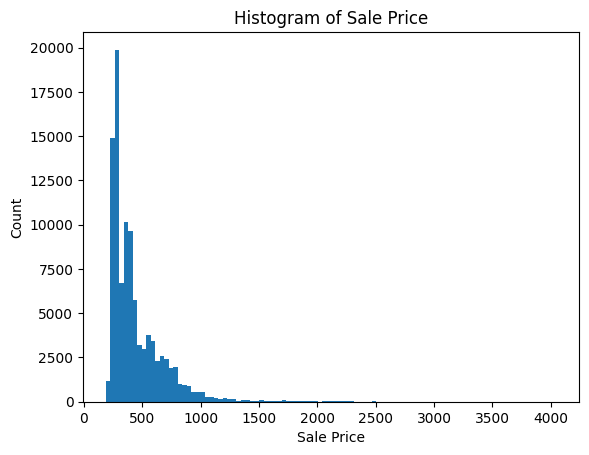

In [105]:
#Distribution of Sale Price
plt.hist(x=df["sale_price"], bins=100);

plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Histogram of Sale Price");

Clearly, the histogram is right skewed, most of the prices fall under 500 dollars


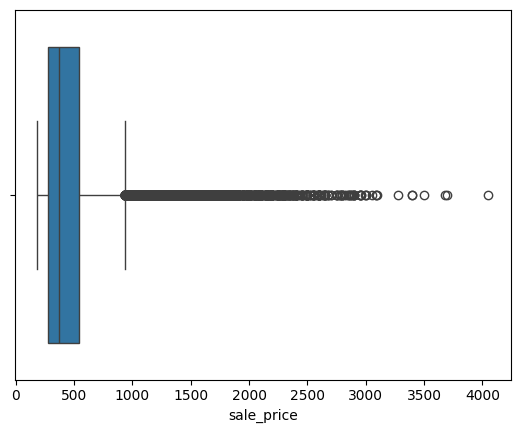

In [106]:
sns.boxplot(x = "sale_price", data=df);


This box and whisker plot demonstrates that Sale Price has quite a few high outliers.

Break

In [107]:
basic_retailprice = {}

basic_retailprice["Mean"] = mean(df["retail_price"])
basic_retailprice["Median"] = median(df["retail_price"])
basic_retailprice["Standard Deviation"] = stdev(df["retail_price"])

basic_retailprice

{'Mean': 208.613589979591,
 'Median': 220.0,
 'Standard Deviation': 25.200009547820848}

Next, let's take a look at Retail Price. The mean is 208.61 dollars, the median is 220.00 dollars, and the standard deviation is 25.20 dollars. The small standard deviation in Retail Price is due to manufacturers making all sneakers of a certain type cost the same regardless of colorway. For example, all Yeezys in the data retail for 220 dollars, regardless of how much they resell for on StockX.



In [108]:
basicstats_shoesize = {}

basicstats_shoesize["Mean"] = mean(df["shoe_size"])
basicstats_shoesize["Median"] = median(df["shoe_size"])
basicstats_shoesize["Mode"] = mode(df["shoe_size"])

basicstats_shoesize

{'Mean': 9.344181439833527, 'Median': 9.5, 'Mode': 10.0}

Now let's take a look at Shoe Size. Though not explicitly stated, these are most likely mens shoe sizes. Unlike Sale Price and Retail Price, Shoe Size is discrete. The mean is 9.34, the median is 9.5, and the mode is 10.

Below is a histogram of Shoe Size. The distribution looks sensible, as the middle sizes (8-12) have the highest frequencies.

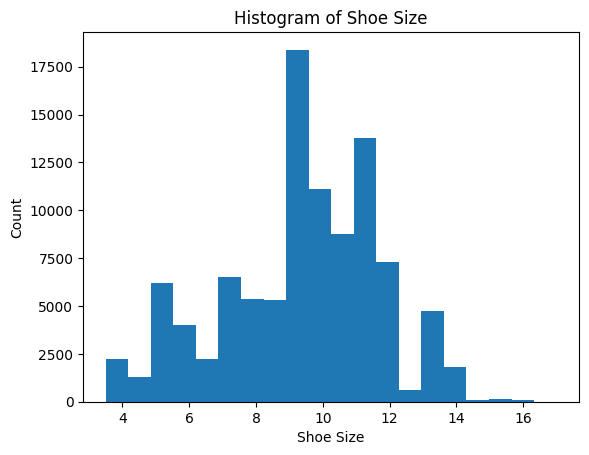

In [109]:
plt.hist(x=df["shoe_size"], bins=20);

plt.xlabel("Shoe Size")
plt.ylabel("Count")
plt.title("Histogram of Shoe Size");


This box and whisker plot shows that there are not a lot of outliers in Shoe Size.



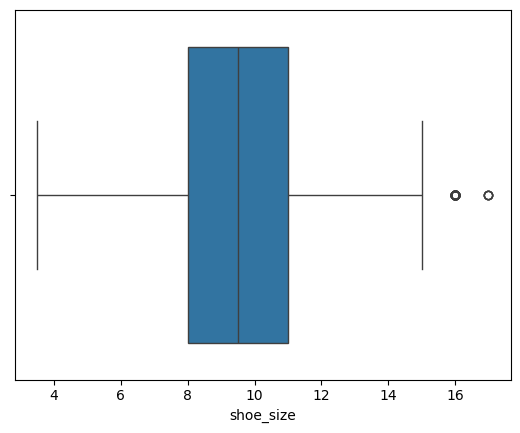

In [110]:
sns.boxplot(x = "shoe_size", data= df);

break

In [111]:
#Looking at the brandwise distribution of sneakers in our dataset
df["brand"].value_counts().to_frame()


,count
brand,
Yeezy,72162
Off-White,27794


In [112]:
#Looking at the top 5 most ordered sneakers
df["sneaker_name"].value_counts().to_frame().head(n=5)


,count
sneaker_name,
adidas Yeezy Boost 350 V2 Butter,11423
Adidas Yeezy Boost 350 V2 Beluga 2pt0,10395
Adidas Yeezy Boost 350 V2 Zebra,10110
Adidas Yeezy Boost 350 V2 Blue Tint,9297
Adidas Yeezy Boost 350 V2 Cream White,9097


In [113]:
#Looking at the top regions ordering these sneakers
df["buyer_region"].value_counts().to_frame().head(n=5)


,count
buyer_region,
California,19349
New York,16525
Oregon,7681
Florida,6376
Texas,5876


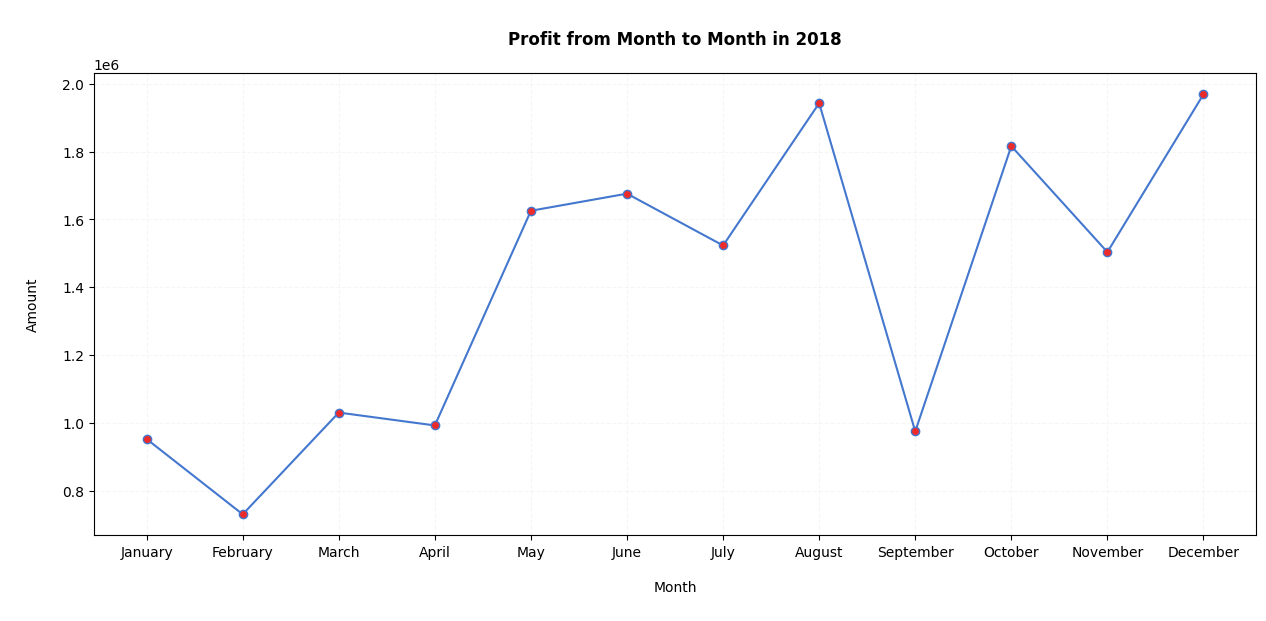

In [114]:
# Profit from month to month in 2018
profit_2018 = df[df['order_date'].dt.year == 2018]
profit_2018 = profit_2018.sort_values(['order_date','order_month'])
profit_2018 = profit_2018.groupby([profit_2018['order_date'].dt.month,'order_month'])['profit'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.plot('order_month', 'profit', color='#4477CE', marker='o', markerfacecolor='#ED2B2A', data=profit_2018)
plt.title(f'\nProfit from Month to Month in 2018\n', fontweight='bold')
plt.xlabel(f'\nMonth\n')
plt.ylabel(f'\nAmount\n')
plt.grid(True, linestyle='--')


plt.show()

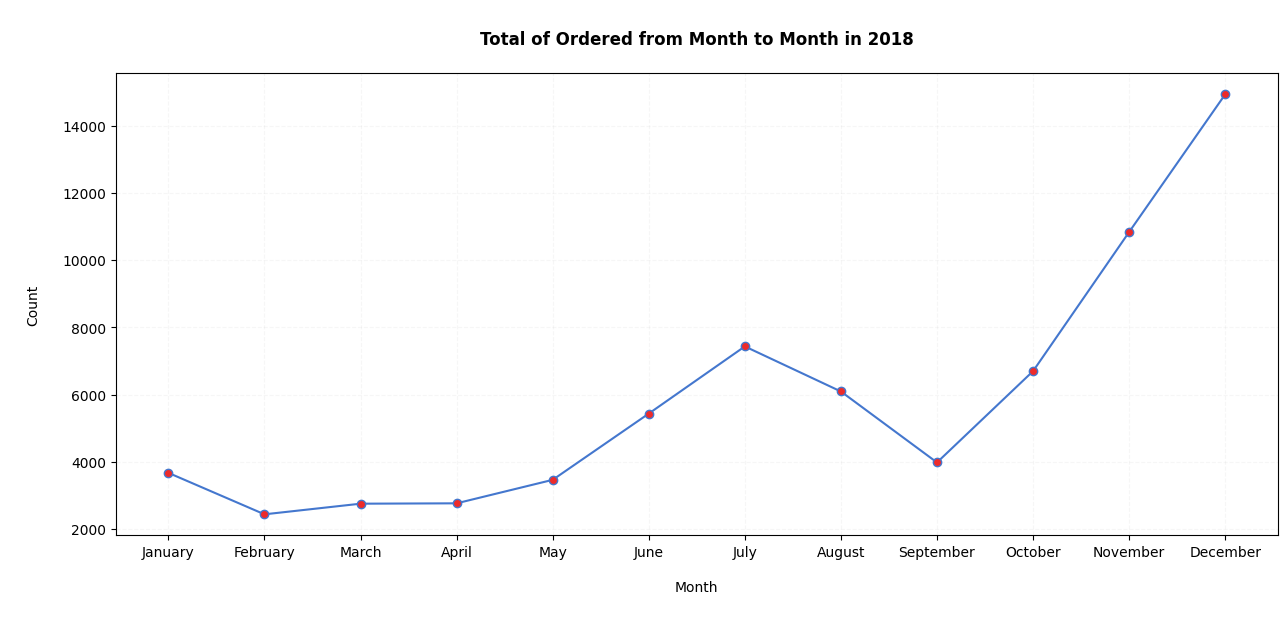

In [115]:
# Number of orders from month to month in 2018
ordercnt_2018 = df[df['order_date'].dt.year == 2018]
ordercnt_2018 = ordercnt_2018.sort_values(['order_date','order_month'])
ordercnt_2018 = ordercnt_2018.groupby([ordercnt_2018['order_date'].dt.month,'order_month']).agg({'order_date': 'count'}).rename(columns={'order_date':'count'}).reset_index()

plt.figure(figsize=(15, 6))
plt.plot('order_month', 'count', color='#4477CE', marker='o', markerfacecolor='#ED2B2A', data=ordercnt_2018)
plt.title(f'\nTotal of Ordered from Month to Month in 2018\n', fontweight='bold')
plt.xlabel(f'\nMonth\n')
plt.ylabel(f'\nCount\n')
plt.grid(True, linestyle='--')


plt.show()

##Multivariable Analysis

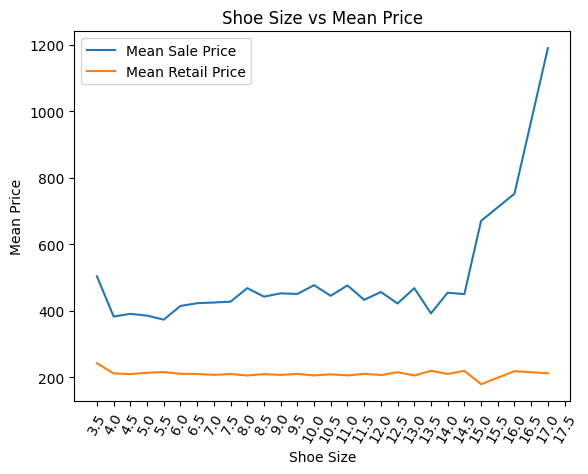

In [116]:
#Graphical representation of Mean Sale Price and Mean Retail Price by Shoe Size (table above).
fig = plt.plot(df.groupby('shoe_size')['sale_price'].mean(), label='Mean Sale Price')
plt.plot(df.groupby('shoe_size')['retail_price'].mean(), label='Mean Retail Price')

plt.xlabel("Shoe Size")
plt.ylabel("Mean Price")
plt.title("Shoe Size vs Mean Price")

plt.xticks(np.arange(min(df["shoe_size"]), max(df["shoe_size"])+1,0.5),rotation = 60);
plt.legend()

This plot displays the average sale price and retail price for each shoe size. It appears that the sale price is generally higher than the retail price across all sizes, indicating a resale market with profit potential. There seems to be a slight trend of increasing mean sale price with increasing shoe size, particularly for sizes above 6.

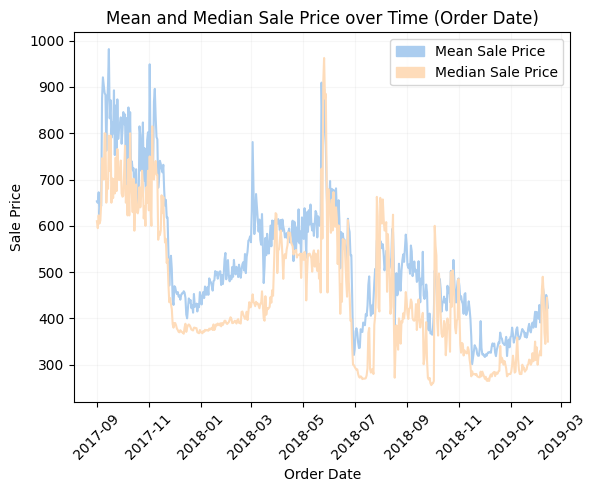

In [117]:
#Overlaid plot of Mean vs Median Sale Price over Order Date
fig = plt.plot(df.groupby('order_date')['sale_price'].mean(), color = '#ABCDEF', alpha = 1)
plt.plot(df.groupby('order_date')['sale_price'].median(), color = '#FEDCBA', alpha = 1)

plt.xlabel("Order Date")
plt.ylabel("Sale Price")
plt.title("Mean and Median Sale Price over Time (Order Date)")

blue_patch, orange_patch = mpatch.Patch(color = '#ABCDEF', label = "Mean Sale Price"), \
mpatch.Patch(color = '#FEDCBA', label = "Median Sale Price")
plt.legend(handles = [blue_patch, orange_patch])

plt.tick_params(axis='x',labelbottom = True)
plt.xticks(rotation = 45)
plt.rcParams["grid.alpha"] = 0.1
plt.grid(True)

The graph above plots Mean and Median Sale Price over time. In general, Sale Price seems to be decreasing over the time span of the data. There are some steep increases, usually marked by the releases of individual sneakers with high demand. For example, there is a massive spike in Sale Price around June 2018. This corresponds with the pre-release period of the Off-White Air Jordan 1 in the UNC colorway. Some individual pairs sold for nearly 4,000 dollars, driving up the Sale Price at that time. The steep drops are most likely due to a very hype sneaker selling out soon after release on StockX. If no one has a pair of a very sought after shoe, then no transactions can take place involving said shoe. This results in a drop in mean Sale Price for the dataset as a whole.

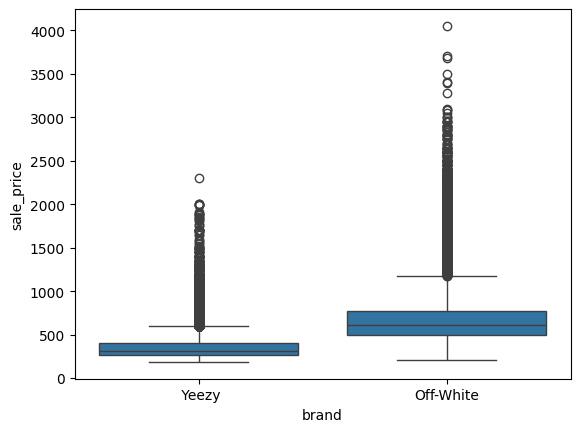

In [118]:
#Boxplot of Brand vs Sale Price
sns.boxplot(x = "brand", y = "sale_price", data=df);

Looking at the boxplot above, it is clear that Off-Whites have a higher median and greater spread with regards to Sale Price. Both brands of shoes have a lot of high outliers, but Off-White outliers extend to higher dollar amounts.

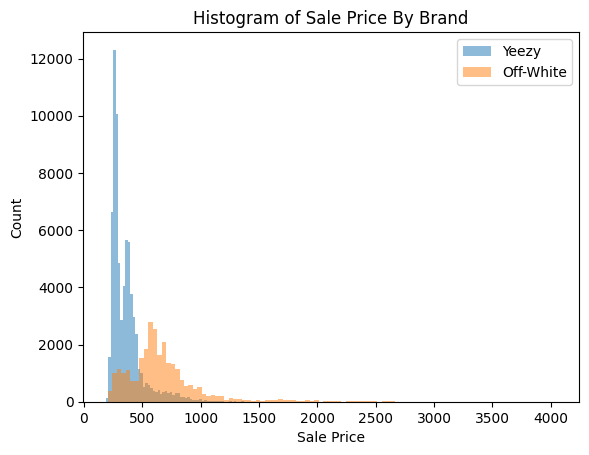

In [119]:
#Overlaid histogram of Sale Price broken down by Brand
bins = 100
plt.hist(df.loc[df["brand"] == " Yeezy","sale_price"], bins, alpha=0.5, label='Yeezy',)
plt.hist(df.loc[df["brand"] == "Off-White","sale_price"], bins, alpha=0.5, label='Off-White')

plt.legend(loc='upper right')

plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Histogram of Sale Price By Brand")

plt.show()

This overlaid histogram below shows that a greater volume of Yeezys are sold at lower prices, while Off-Whites sell at a lower volume for higher prices.

## Analysis of Price ratio

The first new feature (and most interesting) is price_ratio. The mean is 2.25, the median is 1.70, and the standard deviation is 1.5. For clarity, the transactions in this data have a Sale Price that is 2.25 times the Retail Price on average. I found that price_ratio was the best way to adjust for differing Retail Price between different sneaker models. Note that price_ratio cannot be less than or equal to 0 because no one gets free or negatively priced shoes on StockX.

In [120]:
#Looking at mean and median of price_ratio
basicstats_priceratio = {}

basicstats_priceratio["Mean"] = mean(df["price_ratio"])
basicstats_priceratio["Median"] = median(df["price_ratio"])
basicstats_priceratio["Standard Deviation"] = stdev(df["price_ratio"])

basicstats_priceratio

{'Mean': 2.2482447702395354,
 'Median': 1.7045454545454546,
 'Standard Deviation': 1.5085629071083255}

The following is a box and whisker plot of price_ratio. Not surprisingly, it looks quite similar to the same plot of Sale Price, but the outliers have become compressed into a smaller range due to the transformation.

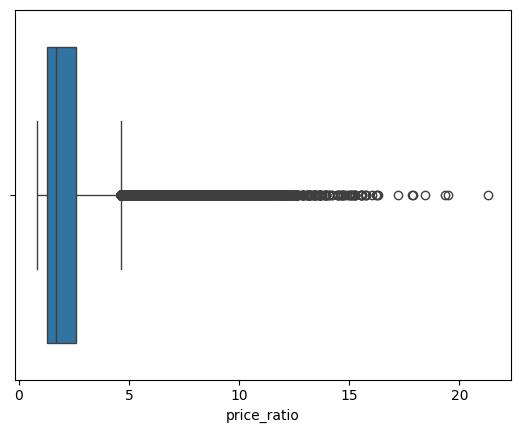

In [121]:
#Boxplot of price_ratio.
sns.boxplot(x=df["price_ratio"]);

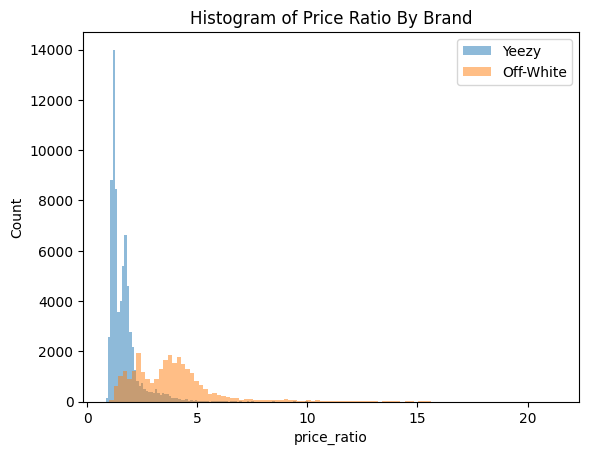

In [122]:
#Overlaid histogram of price_ratio broken down by Brand.
bins = 100
plt.hist(df.loc[df["brand"] == " Yeezy","price_ratio"], bins, alpha=0.5, label='Yeezy')
plt.hist(df.loc[df["brand"] == "Off-White","price_ratio"], bins, alpha=0.5, label='Off-White')

plt.legend(loc='upper right')

plt.xlabel("price_ratio")
plt.ylabel("Count")
plt.title("Histogram of Price Ratio By Brand")

plt.show()

The histogram above plots the distribution of price_ratio separated by Brand. Here it is very easy to see how the distribution of price_ratio differs between Yeezys and Off-Whites.

##Analysis of Date Difference

In [123]:
#Basic statistics of the difference between Order Date and Release Date?
basicstats_datediff = {}

basicstats_datediff["Mean"] = mean(df["date_diff"])
basicstats_datediff["Median"] = median(df["date_diff"])
basicstats_datediff["Standard Deviation"] = stdev(df["date_diff"])
basicstats_datediff["Range"] = [min(df["date_diff"]), max(df["date_diff"])]

basicstats_datediff

{'Mean': 183.70872183760855,
 'Median': 56.0,
 'Standard Deviation': 232.3541419592979,
 'Range': [-69.0, 1321.0]}

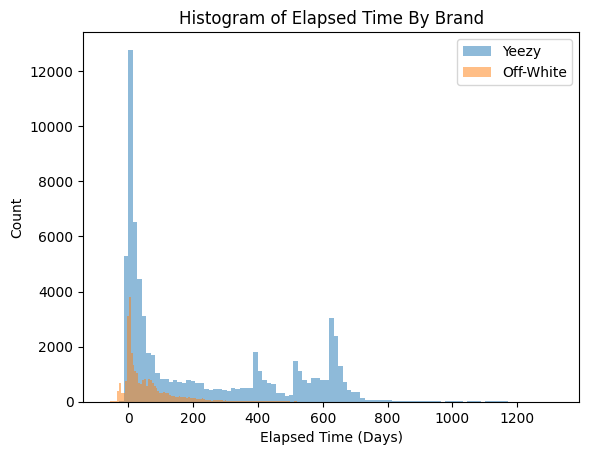

In [124]:
#Overlaid histograms of the elapsed time between Order and Release dates broken down by brand.
bins = 100
plt.hist(df.loc[df["brand"] == " Yeezy","date_diff"], bins, alpha=0.5, label='Yeezy',)
plt.hist(df.loc[df["brand"] == "Off-White","date_diff"], bins, alpha=0.5, label='Off-White')

plt.legend(loc='upper right')

plt.xlabel("Elapsed Time (Days)")
plt.ylabel("Count")
plt.title("Histogram of Elapsed Time By Brand")

plt.show()

This overlaid histogram of date_diff separated by Brand shows that Yeezys have the largest variability in time between Release Date and Order Date, especially looking at the higher extremes. This makes sense, because data collection started at roughly the same time that "The Ten" (Off-White shoes) were being released. Yeezys, however, were released earlier than the data was collected, especially the original Yeezy Boost 350s. This leads to the long tail in the date_diff distribution for Yeezys.

Based on our exploration of the existing and engineered features, further understanding and modeling price_ratio may be in the best interest of StockX. Using price_ratio balances the needs of the company and consumers as opposed to using Sale Price alone. For StockX, price_ratio predictions could easily be converted into revenue by multiplying the shoes by their Retail Price and then calculating fees. For buyers on the platform, using price_ratio allows their voice to be heard in the selective promoting process. Buyers have to accept the resale prices, and price_ratio better captures how much consumers want a specific shoe than Sale Price alone. Because it balances StockX's goal of maximizing revenue and matching sneakerhead demands, I believe that price_ratio is the best target variable for modeling. Check out the modeling notebook if you are interested in seeing what models I try and their results!

##Conclusion


Based on the exploration of the existing and engineered features, further understanding and modeling the price ratio may be in the best interest of StockX. Using the price ratio balances the needs of the company and consumers as opposed to using Sale Price alone. For StockX, price ratio predictions could easily be converted into revenue by multiplying the shoes by their Retail Price and then calculating fees. For buyers on the platform, using the price ratio allows their voice to be heard in the selective promoting process. Buyers have to accept the resale prices, and the price ratio better captures how much consumers want a specific shoe than Sale Price alone. Because it balances StockX's goal of maximizing revenue and matching sneakerhead demands, it is suggested that the price ratio is the best target variable for modeling.

In this analysis, we used sneaker transaction data from StockX to understand what makes certain sneakers hype. We found that Off-Whites are, in fact, more hype than Yeezys. StockX can use these results to make decisions on which sneakers to promote to buyers based on how they want to balance maximal revenue with buyer interests.